# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [103]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [39]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

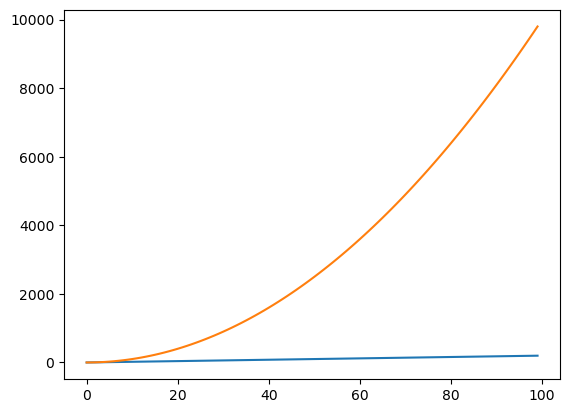

In [40]:
# Method 1
plt.plot(x,y)
plt.plot(x,z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

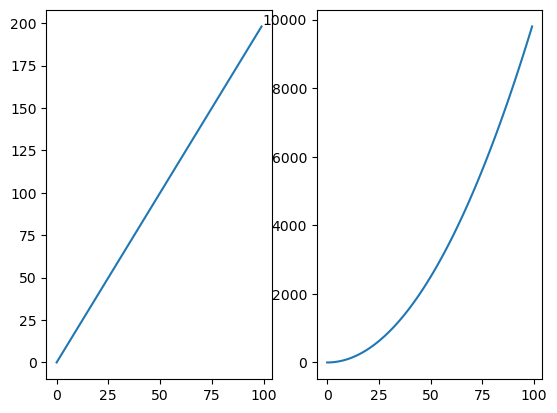

In [41]:
# Method 2
plot_options, (chart_1, chart_2) = plt.subplots(nrows=1, ncols=2)
chart_1.plot(x,y)
chart_2.plot(x,z)


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0.5, 1.0, 'fig x-z')

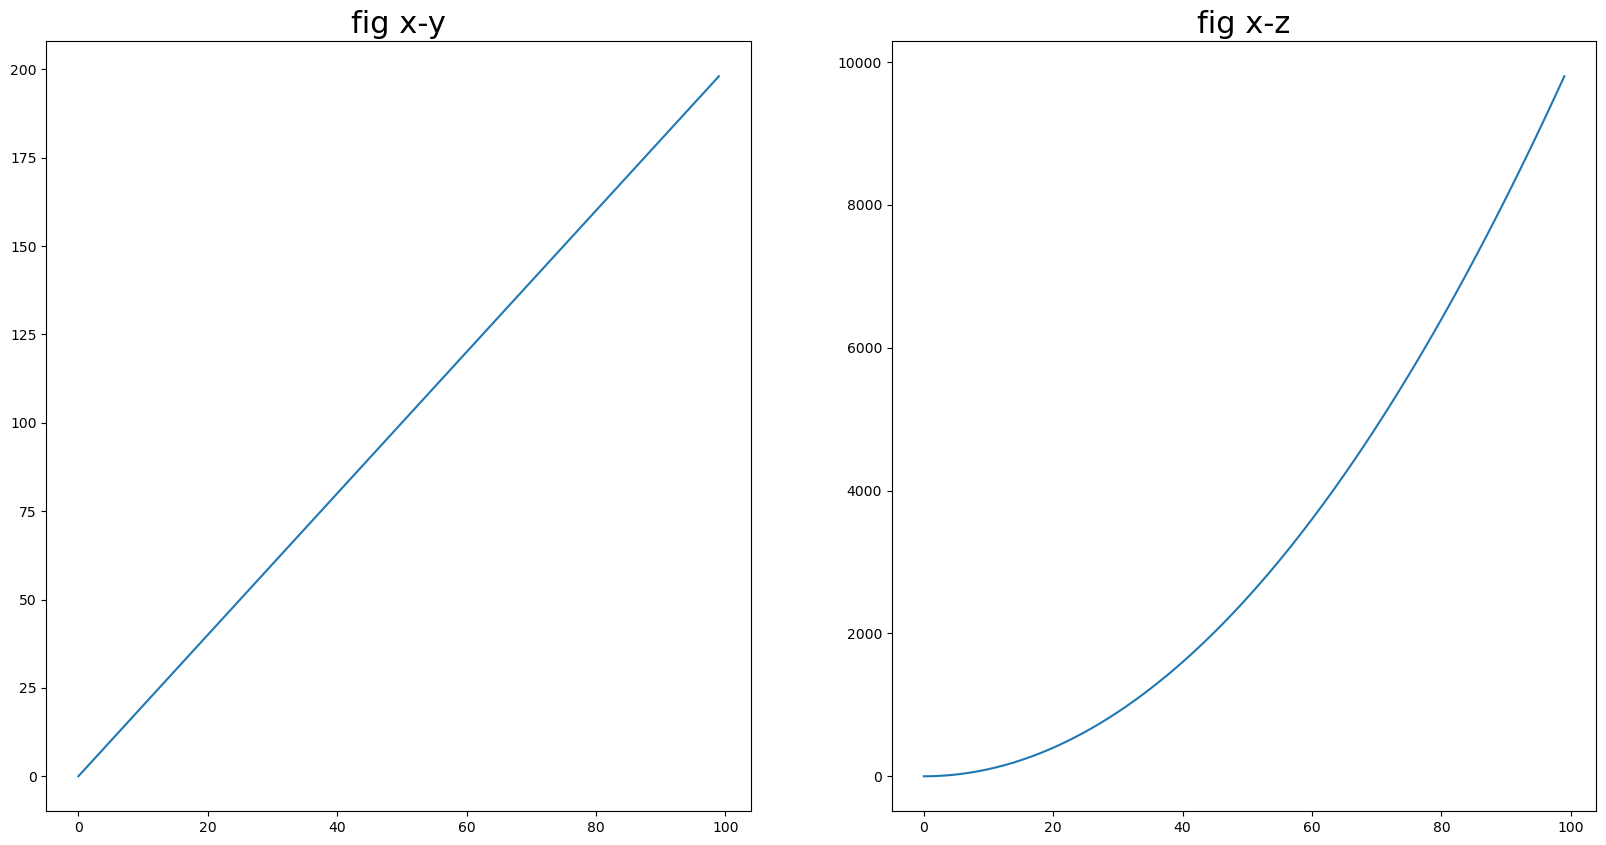

In [42]:
# your code here
plot_options, (chart_1, chart_2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

chart_1.plot(x,y)
chart_2.plot(x,z)

chart_1.set_title("fig x-y",  fontdict = {'fontsize':22})
chart_2.set_title("fig x-z", fontdict = {'fontsize':22})


#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

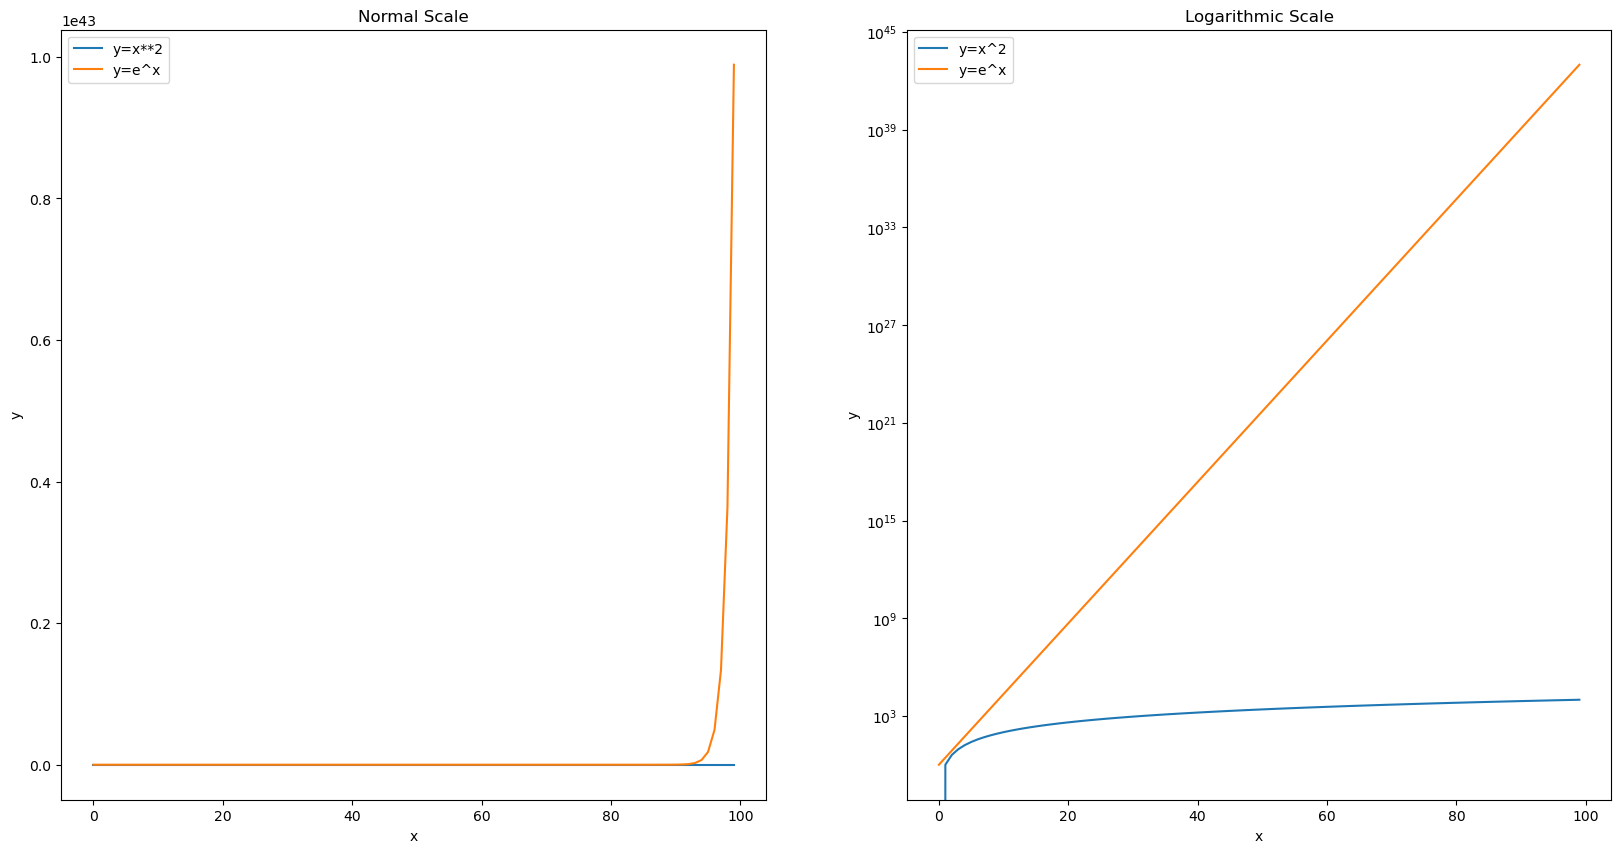

In [43]:
# your code here

# Define the y values
x = np.arange(0,100)
y1 = x**2
y2 = np.exp(x)

plot_options, (chart_1, chart_2) = plt.subplots(1, 2, figsize=(20,10))

# Plot y = x^2 on the first subplot with normal scale
chart_1.plot(x, y1, label="y=x**2")
chart_1.plot(x, y2, label="y=e^x")
chart_1.legend()
chart_1.set_xlabel("x")
chart_1.set_ylabel("y")
chart_1.set_title("Normal Scale")

# Plot 𝑦 = 𝑒^x on the second subplot with logarithmic scale
chart_2.plot(x, y1, label="y=x^2")
chart_2.plot(x, y2, label="y=e^x")
chart_2.legend()
chart_2.set_xlabel("x")
chart_2.set_ylabel("y")
chart_2.set_yscale("log")
chart_2.set_title("Logarithmic Scale")


plt.show()


#### As a bonus challenge, try to add a legend to the plot.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


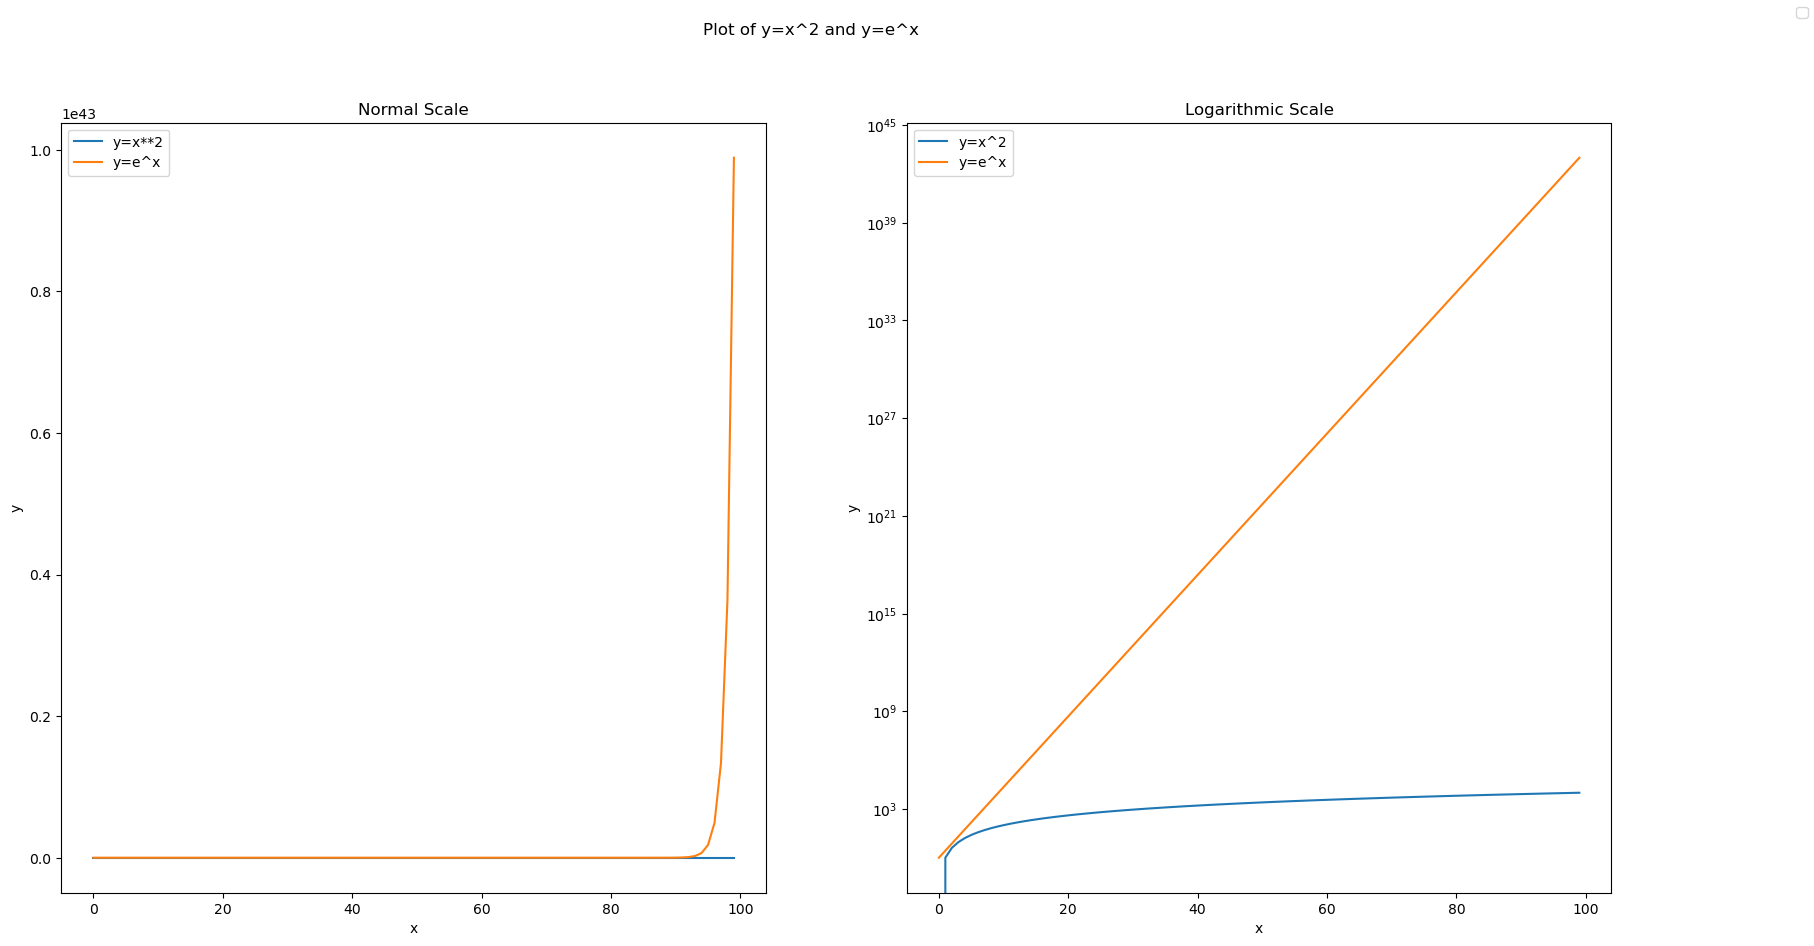

In [44]:
# your code here
# Define the y values
x = np.arange(0,100)
y1 = x**2
y2 = np.exp(x)

plot_options, (chart_1, chart_2) = plt.subplots(1, 2, figsize=(20,10))
plot_options.legend()
plot_options.suptitle("Plot of y=x^2 and y=e^x")

# Plot y = x^2 on the first subplot with normal scale
chart_1.plot(x, y1, label="y=x**2")
chart_1.plot(x, y2, label="y=e^x")
chart_1.legend()
chart_1.set_xlabel("x")
chart_1.set_ylabel("y")
chart_1.set_title("Normal Scale")

# Plot 𝑦 = 𝑒^x on the second subplot with logarithmic scale
chart_2.plot(x, y1, label="y=x^2")
chart_2.plot(x, y2, label="y=e^x")
chart_2.legend()
chart_2.set_xlabel("x")
chart_2.set_ylabel("y")
chart_2.set_yscale("log")
chart_2.set_title("Logarithmic Scale")


plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [45]:
# your code here
fitbit = pd.read_csv("fitbit2.csv")


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

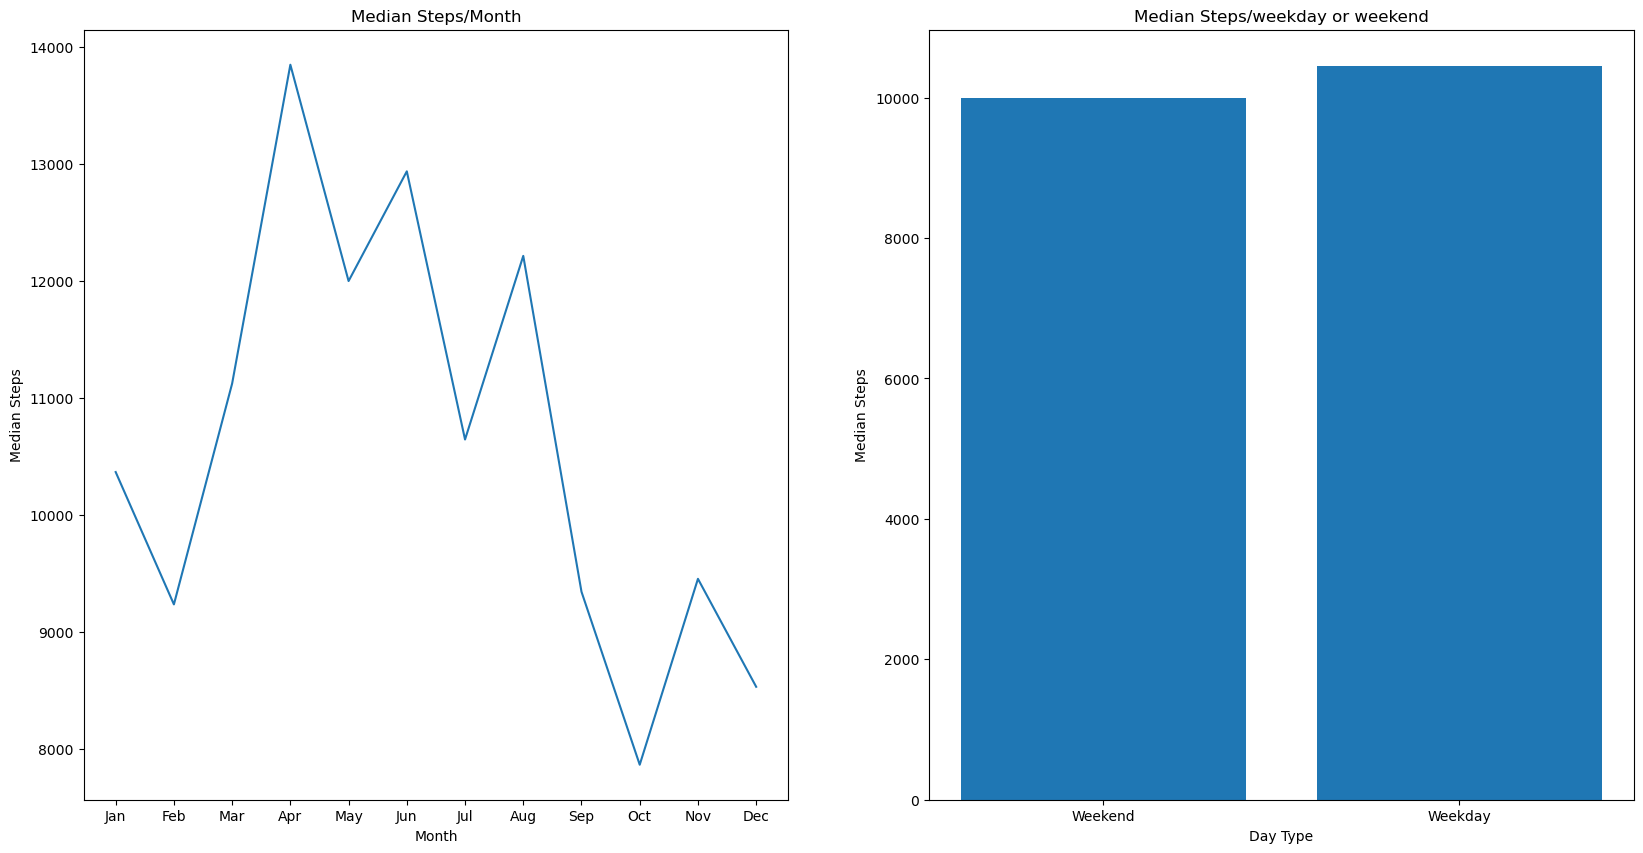

In [46]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

# Group  data by month and aggregate by median steps
steps_by_month = fitbit.groupby("Months_encoded")["Steps"].median()

# Create subplots with 2 columns
figure, (fig_1, fig_2) = plt.subplots(1, 2, figsize=(20,10))

# Plot the median number of steps by month on the first subplot
fig_1.plot(steps_by_month.index, steps_by_month.values)
fig_1.set_xticks(np.arange(1, 13))
fig_1.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                     "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
fig_1.set_xlabel("Month")
fig_1.set_ylabel("Median Steps")
fig_1.set_title("Median Steps/Month")

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

# Group the data by week_or_weekend and aggregate by the median steps
steps_by_weekday = fitbit.groupby("Work_or_Weekend")["Steps"].median()

# Plot the median number of steps by week or weekend on the second subplot
fig_2.bar(steps_by_weekday.index, steps_by_weekday.values)
fig_2.set_xticks([0, 1])
fig_2.set_xticklabels(["Weekend", "Weekday"])
fig_2.set_xlabel("Day Type")
fig_2.set_ylabel("Median Steps")
fig_2.set_title("Median Steps/weekday or weekend")

# Save the figures to a folder called "figures"
figure.savefig("figures.png")

# Display the plot
plt.show()



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

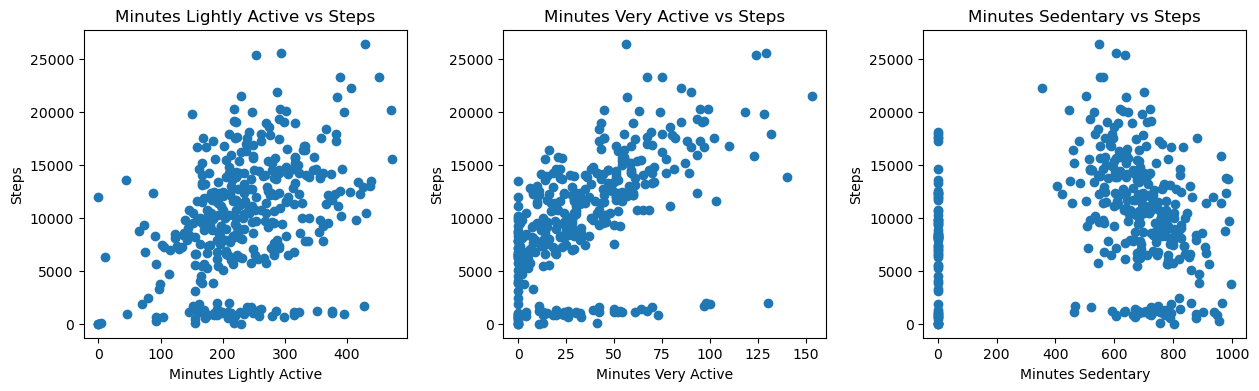

In [47]:
# your code here

# pair list tuples containing feature pairs and their corresponding subplot indices
pairs = [("Minutes Lightly Active", "Steps", 1),
                 ("Minutes Very Active", "Steps", 2),
                 ("Minutes Sedentary", "Steps", 3)]

# Create a figure with three subplots
plot_options, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Loop over each feature pair and plot a scatter plot on the corresponding subplot
for feature1, feature2, subplot_idx in pairs:
    ax = axes[subplot_idx - 1]  # Get the corresponding subplot axis
    ax.scatter(fitbit[feature1], fitbit[feature2])
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_title(f"{feature1} vs {feature2}")

# Adjust spacing between subplots
plot_options.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [48]:
# your code here
titanic = pd.read_csv("titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

In [49]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [50]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [32]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(object)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

[]

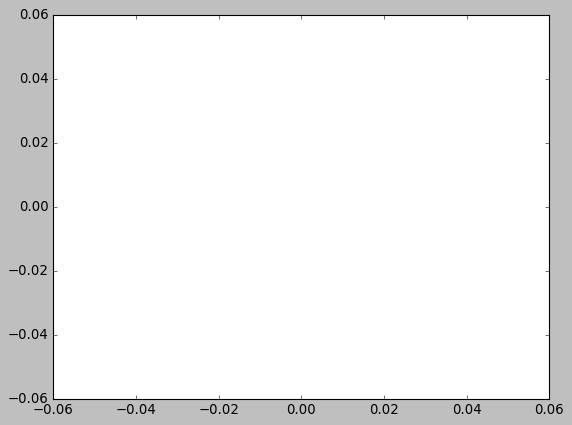

In [51]:
# your code here
plt.style.use('classic')
plt.plot(figsize=(6, 2))

#### Use the right visulalization to show the distribution of column `Age`.

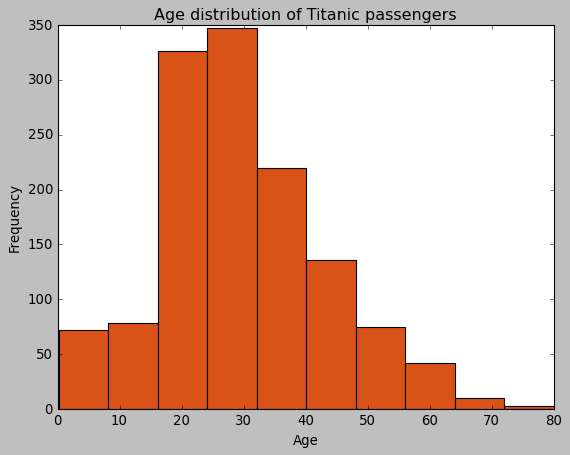

In [63]:
# your code here
plt.hist(titanic["Age"], facecolor="#D95319")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution of Titanic passengers")
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

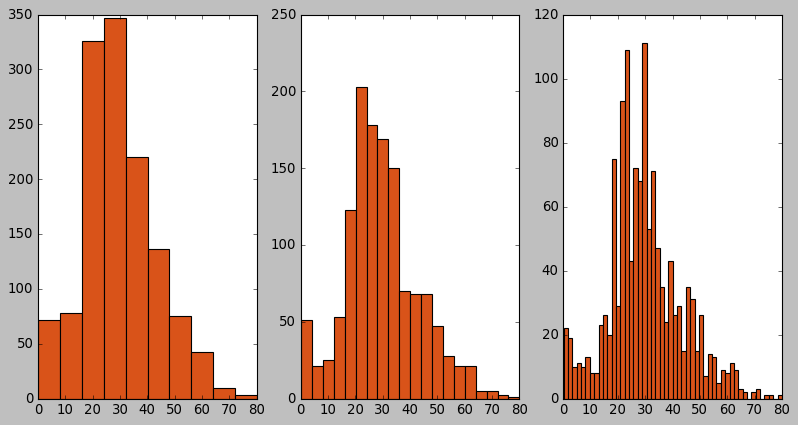

In [101]:
# your code here
#plt.style.use('classic')
figure, (plot_1, plot_2, plot_3) = plt.subplots(1,3, figsize=  (12,6))

plot_1.hist(titanic["Age"], facecolor="#D95319", bins = 10)
plot_2.hist(titanic["Age"], facecolor="#D95319", bins = 20)
plot_3.hist(titanic["Age"], facecolor="#D95319", bins = 50)
plt.show()


#### How does the bin size affect your plot?

In [ ]:
"""
The bin size determine the number of bars in the plot. Higher the bin size more bar in the plot, and 
lower the bin size fewer number of bars in the plot. Also higher the bin size, the representation of
data in each bar becomse lower in range and vice versa. 
"""

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

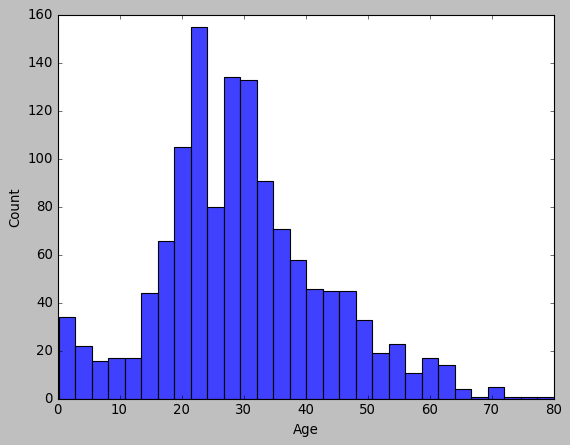

In [104]:
# your code here
sns.histplot(titanic["Age"])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:ylabel='Age'>

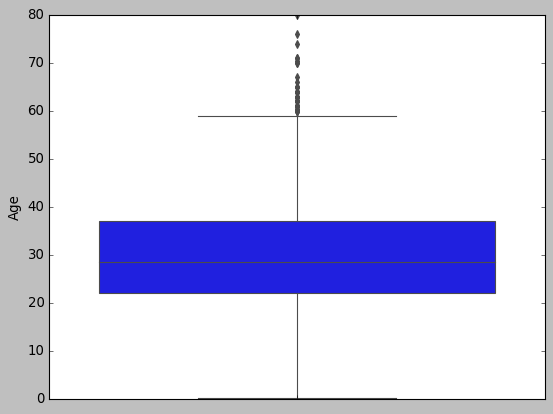

In [152]:
# your code here
sns.boxplot(data = titanic["Age"], y = titanic["Age"], orient= "v")

In [ ]:
"""
From above box plot it can be intrepreted that the median age of passenger is just below 30 and first quartile is just above 20,
second quartile is somewhere around 38. The minimum age is 0 and maximum age is 80. There are some value 
that are above upper fence they might be outlier. To see whether they are outlier or not. we need to calclculate interquartile range
and use following formula: 
outlier = q3+1.5*IQR
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Age'>

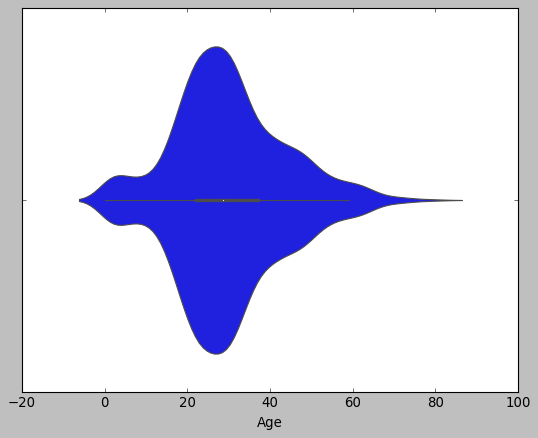

In [154]:
# your code here

sns.violinplot(x=titanic["Age"])



#### What additional information does the last plot provide about feature `Age`?

In [155]:
"""
A violin plot is similar to a box plot, but it also shows the shape of the distribution by creating a density plot on each side of the box.
Here we can see that frequency of age above 60 is pointed and has very fewer passenger on that age group.
"""

'\nA violin plot is similar to a box plot, but it also shows the shape of the distribution by creating a density plot on each side of the box.\nHere we can see that frequency of age above 60 is pointed and has very fewer passenger on that age group.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [17]:
# your code here